# Intensive Sphere Explorations
The diffusion rays are only as good as the diffusion coordinates. To this end, we painstakingly tune the parameters of the graph until the diffusion map of the sphere reconstructs it faithfully.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# for constructing the graph and plotting nicely
import graphtools
from phate import phate
import scprep
%load_ext autoreload
%autoreload 2
from pecan import data
from pecan.curvature import DiffusionForkCurvatureV2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Investigation of parameters on sphere

In [2]:
X = data.sphere(2000)

In [4]:
phate_op = phate.PHATE(decay=40)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 4.37 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.12 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.80 seconds.
Calculated PHATE in 15.40 seconds.
Eigendecomposing diffusion matrix
[-0.27718713 -0.27467393 -0.27332408 ...  0.99856198  0.99870591
  1.        ]


/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

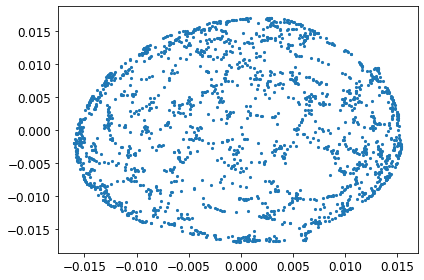

In [6]:
scprep.plot.scatter2d(dmap[:,:2])

Apparently a decay of 40 doesn't solve the sparsity problems.

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 5.02 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.23 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 10.02 seconds.
Calculated PHATE in 16.36 seconds.
Eigendecomposing diffusion matrix
[-0.25836884 -0.25491401 -0.25396677 ...  0.99852933  0.9986733
  1.        ]
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


<AxesSubplot:>

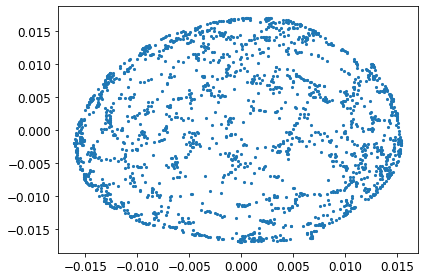

In [7]:
phate_op = phate.PHATE(decay=20)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

20 doesn't look any better. If anything, the trend is worsening.
Let's try with the anisotropy.

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 7.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.84 seconds.
Calculated PHATE in 18.15 seconds.
Using anisotropy alpha=0.5
Eigendecomposing diffusion matrix
[-0.05633838 -0.05543439 -0.05491686 ...  0.19646678  0.19648203
  0.20000035]
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, 

<AxesSubplot:>

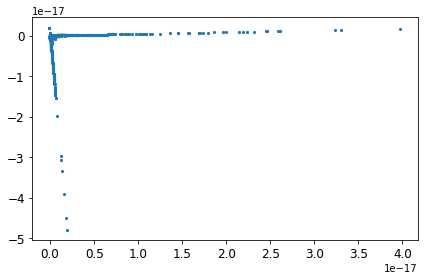

In [9]:
phate_op = phate.PHATE(decay=40)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

Yikes! That really doesn't work.

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 5.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 11.96 seconds.
Calculated PHATE in 18.46 seconds.
Eigendecomposing diffusion matrix
[-0.29085991 -0.28362619 -0.27861199 ...  0.99856729  0.99871687
  1.        ]
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

<AxesSubplot:>

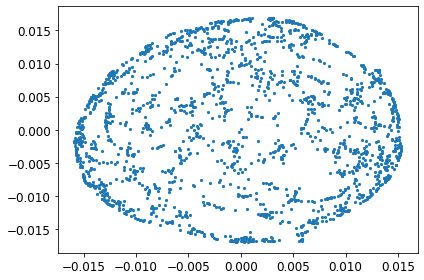

In [10]:
phate_op = phate.PHATE(decay=80)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 0.20 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 4.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.54 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 10.40 seconds.
Calculated PHATE in 16.83 seconds.
Eigendecomposing diffusion matrix
[-0.00429824 -0.00344068 -0.00331136 ...  0.99532176  0.99544356
  1.        ]
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

<AxesSubplot:>

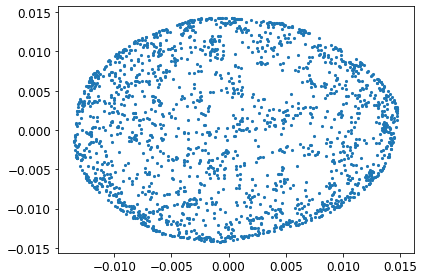

In [11]:
phate_op = phate.PHATE(decay=2)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

*Wow!* That's nice!

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.48 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 4.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 10.01 seconds.
Calculated PHATE in 16.19 seconds.
Eigendecomposing diffusion matrix
[0.00300502 0.00301448 0.00322363 ... 0.96787086 0.96878743 1.        ]
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.

<AxesSubplot:>

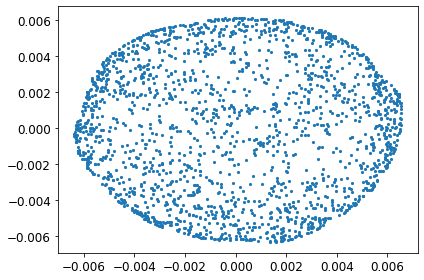

In [12]:
phate_op = phate.PHATE(decay=1)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes3DSubplot:>

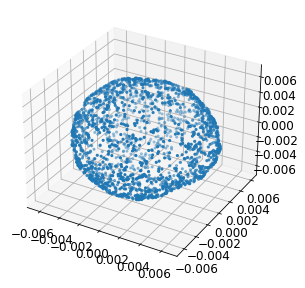

In [13]:
scprep.plot.scatter3d(dmap[:,:3])

In [18]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()
def plot_3d(X,distribution,title="",lim=1):
    d = {'x':X[:,0],'y':X[:,1],'z':X[:,2],'colors':distribution}
    df = pd.DataFrame(data=d)
    fig = px.scatter_3d(df, x='x',y='y',z='z',color='colors', title=title)
    fig.show()

# Testing diffusion rays with the better kernel settings

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.44 seconds.
  Calculated graph and diffusion operator in 0.54 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 5.56 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.73 seconds.
Calculated PHATE in 16.95 seconds.
Eigendecomposing diffusion matrix
[0.00300502 0.00301448 0.00322363 ... 0.96787086 0.96878743 1.        ]
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<AxesSubplot:>

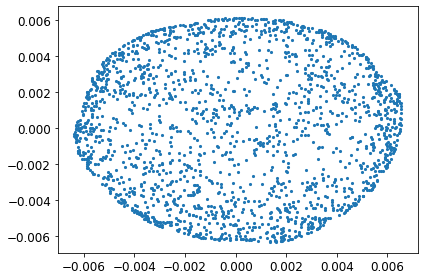

In [23]:
phate_op = phate.PHATE(decay=1)
phate_op.fit_transform(X)
# compute diffusion map from parameters here
G = phate_op.graph
dfc = DiffusionForkCurvatureV2(G,t=phate_op.optimal_t,n_evecs=10)
dmap = dfc.diffusion_coordinates
scprep.plot.scatter2d(dmap[:,:2])

In [28]:
dfc.E**50

array([0.20484472, 0.19537578, 0.18400163, 0.01207747, 0.01027954,
       0.00958057, 0.00880189, 0.00683698, 0.00028708, 0.00026748])

In [114]:
dfc = DiffusionForkCurvatureV2(G,t=19,n_evecs=100, num_points=100)

Eigendecomposing diffusion matrix
[0.00300502 0.00301448 0.00322363 ... 0.96787086 0.96878743 1.        ]


In [115]:
dfc.E**dfc.t

array([1.95195894e-08, 2.29690787e-08, 2.95978829e-08, 3.08039994e-08,
       3.47185615e-08, 4.14684347e-08, 4.84949139e-08, 5.22188250e-08,
       5.87096106e-08, 6.70575950e-08, 7.91783784e-08, 8.56499335e-08,
       9.09215341e-08, 1.02682062e-07, 1.11040420e-07, 1.32924316e-07,
       1.54051821e-07, 1.74980831e-07, 1.87509261e-07, 2.46226450e-07,
       2.51243737e-07, 2.76030525e-07, 3.50285319e-07, 4.24171534e-07,
       4.76901886e-07, 5.43553019e-07, 5.73111885e-07, 6.34408599e-07,
       7.19969530e-07, 8.53014937e-07, 8.84243380e-07, 1.02968725e-06,
       1.12526986e-06, 1.22332212e-06, 1.50383618e-06, 1.60283314e-06,
       2.12177739e-06, 2.21434802e-06, 3.04878177e-06, 3.26560743e-06,
       3.65542550e-06, 5.01719494e-06, 5.73319909e-06, 5.88536476e-06,
       7.29409405e-06, 7.82220449e-06, 9.92606244e-06, 1.16558964e-05,
       1.29540376e-05, 1.42894289e-05, 1.88159641e-05, 2.36310253e-05,
       2.83133458e-05, 3.43861703e-05, 3.90828536e-05, 4.40761746e-05,
      

In [116]:
i = 100
j = 500
ray_coords, ray_deviations, local_points = dfc.diffusion_ray_between(100,500)

In [117]:
distributions = np.zeros(len(X))
distributions[ray_coords] = 1
distributions[i] = 1.5
distributions[j] = 1.5
plot_3d(X, distributions)

In [95]:
ray_deviations

array([6.35576157e-08, 1.31542337e-07, 2.09685546e-07, 3.53739036e-07,
       4.26775560e-07, 4.76435718e-07, 6.82297440e-07, 7.78815431e-07,
       8.45932404e-07, 1.04848964e-06, 1.10071536e-06, 1.16855569e-06,
       1.18563148e-06, 1.19244344e-06, 1.24794114e-06, 1.47022108e-06,
       1.47378783e-06, 1.59744033e-06, 1.71582084e-06, 1.76176398e-06,
       1.77408548e-06, 1.80422848e-06, 1.81084007e-06, 1.89795451e-06,
       2.15409257e-06, 2.26834436e-06, 2.30977692e-06, 2.34957063e-06,
       2.36596577e-06, 2.39938011e-06, 2.47190708e-06, 2.50349047e-06,
       2.55479761e-06, 2.58362869e-06, 2.62529525e-06, 2.66221867e-06,
       2.66717505e-06, 2.67753407e-06, 2.70922361e-06, 2.71078225e-06,
       2.71898290e-06, 3.02946180e-06, 3.08211783e-06, 3.08400737e-06,
       3.19684589e-06, 3.20822603e-06, 3.24228082e-06, 3.35813062e-06,
       3.37925526e-06, 3.38086628e-06])

In [124]:
plot_3d(X, dfc.V[:,-1],title="The first non-trivial diffusion vector")

In [126]:
plot_3d(X, dfc.V[:,-2],title="The second non-trivial diffusion vector")

In [127]:
plot_3d(X, dfc.V[:,-3],title="The third non-trivial diffusion vector")

In [128]:
plot_3d(X, dfc.V[:,-4],title="The fourth non-trivial diffusion vector")

In [129]:
dfc.E

array([0.39285773, 0.39623691, 0.40156011, 0.40240515, 0.40494681,
       0.408751  , 0.41213229, 0.41374022, 0.41629936, 0.41922255,
       0.42290464, 0.42465698, 0.42599403, 0.42873005, 0.43049954,
       0.43459472, 0.43798189, 0.44092824, 0.44253596, 0.44892678,
       0.44940365, 0.45163461, 0.4573332 , 0.46196327, 0.464821  ,
       0.46803237, 0.46933861, 0.47185537, 0.4750078 , 0.47926605,
       0.48017386, 0.48403774, 0.48630445, 0.48844755, 0.49378384,
       0.49544348, 0.50281156, 0.50394294, 0.51249645, 0.51435298,
       0.51741479, 0.52611041, 0.52981733, 0.53054828, 0.53657455,
       0.53855226, 0.54534643, 0.54997698, 0.55304207, 0.55590526,
       0.56401528, 0.57081987, 0.57627677, 0.58220085, 0.58613719,
       0.58985814, 0.59165059, 0.59432795, 0.59966965, 0.60980992,
       0.61381875, 0.61728599, 0.62308647, 0.63055095, 0.63551288,
       0.6495373 , 0.65545371, 0.65702746, 0.67186959, 0.67351966,
       0.67808337, 0.68473275, 0.69417718, 0.6979093 , 0.70162